# Downloading the dataset

In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset'
od.download(dataset_url)

100%|██████████| 211k/211k [00:00<00:00, 52.2MB/s]

In [3]:
# importing the dependancies
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from tqdm.notebook import tqdm


In [4]:
# importing the dataset
dataset_path = "/content/sms-spam-collection-dataset/spam.csv"

df = pd.read_csv(dataset_path, encoding="latin-1")

# checking the top 5 rows of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (5572, 5)


### Process to follow 
1. Data Cleaning 
2. EDA 
3. Text Preprocessing 
4. Model Building 
5. Evaluation 
6. Improvement 
7. Website building 
8. Deployment

## Data Cleaning

In [6]:
# checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# The last three columns has very few values, we can drop those columns 
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

# checking the dataset 
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# for more simplicity we can rename the columns 
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

# changing the order of the columns 
df = df[['text', 'target']]

# checking any 5 samples from the dataset
df.sample(5)

,text,target
2701,"Hiya, sorry didn't hav signal. I haven't seen ...",ham
1517,Our brand new mobile music service is now live...,spam
891,I am great princess! What are you thinking abo...,ham
4465,Hey u still at the gym?,ham
2325,Apps class varaya elaya.,ham


In [9]:
print(f"Checking the distribution of the data:\n{df['target'].value_counts()}")

Checking the distribution of the data:
ham     4825
spam     747
Name: target, dtype: int64


In [10]:
# we can encode the target column 
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder() 

# encoding the target column
df['target'] = encoder.fit_transform(df['target'])

# checking any 5 samples from the dataset 
df.sample(5)

,text,target
4071,Loans for any purpose even if you have Bad Cre...,1
3563,Do you always celebrate NY's with your family ?,0
2144,FreeMsg: Hey - I'm Buffy. 25 and love to satis...,1
2918,Is xy in ur car when u picking me up?,0
1703,Just taste fish curry :-P,0


In [11]:
# checking for the null values 
print(f"Total Null values in the dataset:\n{df.isnull().sum()}")

Total Null values in the dataset:
text      0
target    0
dtype: int64


In [12]:
# checking the duplicate values
print(f"Total Duplicate rows in the dataset: {df.duplicated().sum()}")

Total Duplicate rows in the dataset: 403


In [13]:
print(f"Shape of the dataset before droping the duplicate rows: {df.shape}\n")

# We can remove the duplicate rows 
df = df.drop_duplicates(keep='first')
print(f"dupicate rows: {df.duplicated().sum()}\n")

print(f"Shape of the dataset after droping the duplicate rows: {df.shape}")

Shape of the dataset before droping the duplicate rows: (5572, 2)

dupicate rows: 0

Shape of the dataset after droping the duplicate rows: (5169, 2)


## EDA

Distribution:
0    4516
1     653
Name: target, dtype: int64

From the above graph we can see, the dataset is imbalanced 



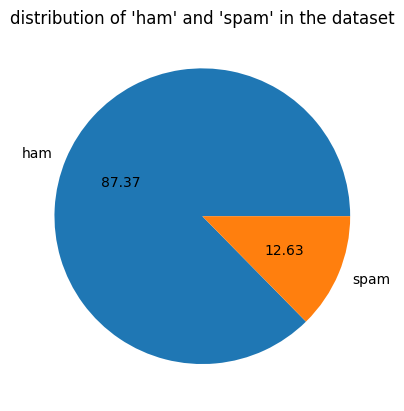

In [14]:
# distribution of 'ham' and 'spam' in the dataset 
print(f"Distribution:\n{df['target'].value_counts()}\n")

plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.title("distribution of 'ham' and 'spam' in the dataset")

print(f"From the above graph we can see, the dataset is imbalanced \n")

In [15]:
# downloading the punkt sentence tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

- number of characters in the text 
- number of words in the text 
- number of sentences in the text

In [16]:
# number of characters in each row of 'text' column 
print(f"First row in the 'text' column:\n{df['text'][0]}")

print(f"\ncharacters in the first row of text")

char =[x for x in df['text'][0]]
print(char)

print(f"\n number of characters in first row of 'text' column: {len(char)}")


First row in the 'text' column:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

characters in the first row of text
['G', 'o', ' ', 'u', 'n', 't', 'i', 'l', ' ', 'j', 'u', 'r', 'o', 'n', 'g', ' ', 'p', 'o', 'i', 'n', 't', ',', ' ', 'c', 'r', 'a', 'z', 'y', '.', '.', ' ', 'A', 'v', 'a', 'i', 'l', 'a', 'b', 'l', 'e', ' ', 'o', 'n', 'l', 'y', ' ', 'i', 'n', ' ', 'b', 'u', 'g', 'i', 's', ' ', 'n', ' ', 'g', 'r', 'e', 'a', 't', ' ', 'w', 'o', 'r', 'l', 'd', ' ', 'l', 'a', ' ', 'e', ' ', 'b', 'u', 'f', 'f', 'e', 't', '.', '.', '.', ' ', 'C', 'i', 'n', 'e', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'g', 'o', 't', ' ', 'a', 'm', 'o', 'r', 'e', ' ', 'w', 'a', 't', '.', '.', '.']

 number of characters in first row of 'text' column: 111


In [17]:
# number of characters in each row 
df['num_characters'] = df['text'].apply(len)

# checking any 5 random samples from the dataset 
df.sample(5)

,text,target,num_characters
1865,Call to the number which is available in appoi...,0,100
395,From here after The performance award is calcu...,0,102
2535,Can you pls pls send me a mail on all you know...,0,155
3729,"I guess you could be as good an excuse as any,...",0,51
4388,"K I'm ready, &lt;#&gt; ?",0,25


In [18]:
# number of words in first row of 'text' column 
print(f"First row in the 'text' column:\n{df['text'][0]}")

print(f"\nwords in the first row of text")
word = lambda x: nltk.word_tokenize(x)
print(word(df['text'][0]))

print(f"\n number of words in first row of 'text' column: {len(word(df['text'][0]))}")

First row in the 'text' column:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

words in the first row of text
['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']

 number of words in first row of 'text' column: 24


word_tokenize --> official_doc --> https://www.nltk.org/_modules/nltk/tokenize.html#word_tokenize

In [19]:
# number of words in each row 
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

# checking first 5 rows in the dataset 
df.head()

,text,target,num_characters,num_words
0,"Go until jurong point, crazy.. Available only ...",0,111,24
1,Ok lar... Joking wif u oni...,0,29,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,U dun say so early hor... U c already then say...,0,49,13
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15


In [20]:
# number of sentence in first row of 'text' column 
print(f"First row in the 'text' column:\n{df['text'][0]}")

print(f"\nsentence in the first row of text")
sent = lambda x: nltk.sent_tokenize(x)
print(sent(df['text'][0]))

print(f"\n number of sentence in first row of 'text' column: {len(sent(df['text'][0]))}")

First row in the 'text' column:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

sentence in the first row of text
['Go until jurong point, crazy..', 'Available only in bugis n great world la e buffet... Cine there got amore wat...']

 number of sentence in first row of 'text' column: 2


sent_tokenize --> official_doc --> https://www.nltk.org/api/nltk.tokenize.sent_tokenize.html#nltk.tokenize.sent_tokenize

In [21]:
# number of sentences in each row 
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

# checking first 5 rows in the dataset 
df.head()

,text,target,num_characters,num_words,num_sentences
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [22]:
# let's compare newly created columns 
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# Now let's compare only 'ham' messages 
print(f"ham messages:")
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

ham messages:


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# Now let's compare only 'spam' messages 
print(f"Spam messages:")
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

Spam messages:


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


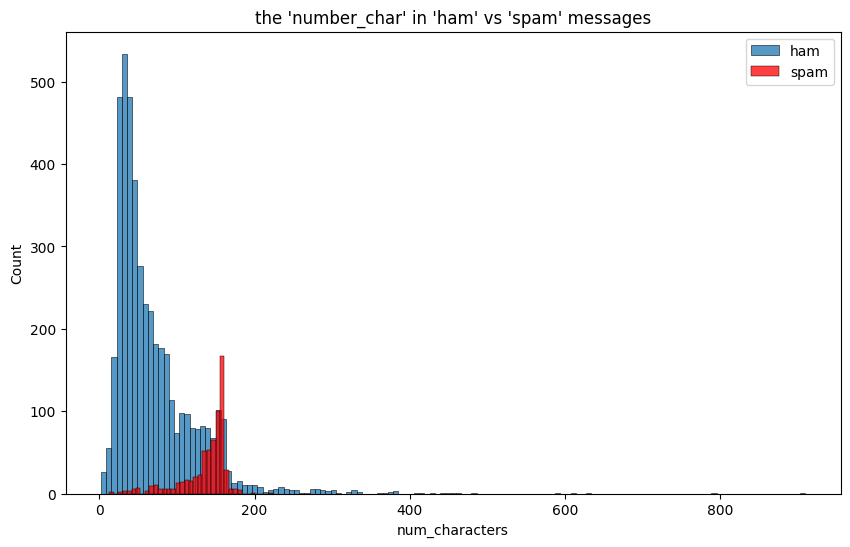

In [25]:
# plotting the 'number_char' in 'ham' vs 'spam' messages
plt.figure(figsize=(10, 6))

sns.histplot(df[df['target']==0]['num_characters'], label='ham')
sns.histplot(df[df['target']==1]['num_characters'], color='red',label='spam')

plt.legend()
plt.title("the 'number_char' in 'ham' vs 'spam' messages");

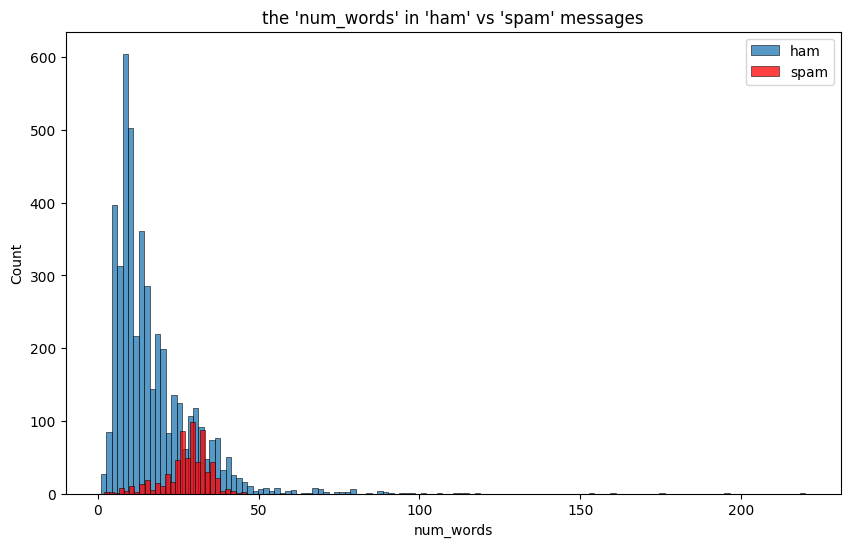

In [26]:
# plotting the 'number_words' in 'ham' vs 'spam' messages
plt.figure(figsize=(10, 6))

sns.histplot(df[df['target']==0]['num_words'], label='ham')
sns.histplot(df[df['target']==1]['num_words'], color='red',label='spam')

plt.legend()
plt.title("the 'num_words' in 'ham' vs 'spam' messages");

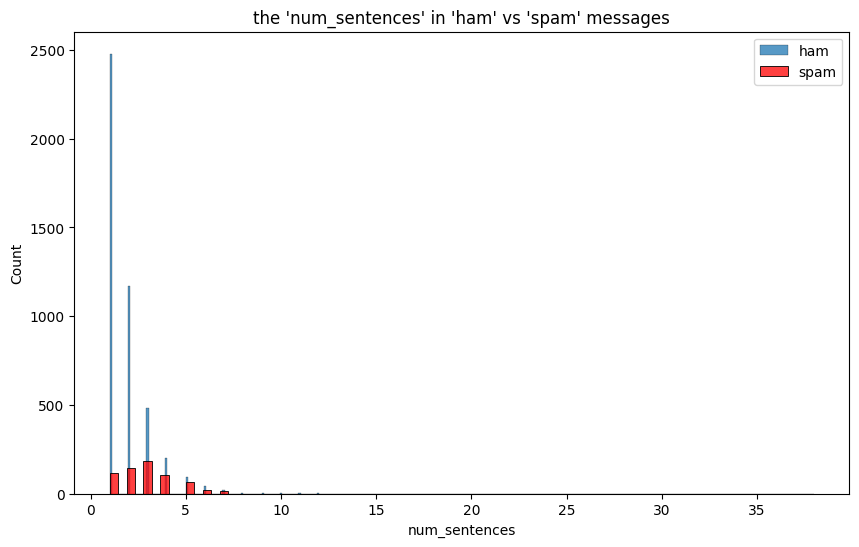

In [27]:
# plotting the 'num_sentences' in 'ham' vs 'spam' messages
plt.figure(figsize=(10, 6))

sns.histplot(df[df['target']==0]['num_sentences'], label='ham')
sns.histplot(df[df['target']==1]['num_sentences'], color='red',label='spam')

plt.legend()
plt.title("the 'num_sentences' in 'ham' vs 'spam' messages");

**Observation** :- The 'spam' messages has maximum charcters and words compare to 'ham' messages

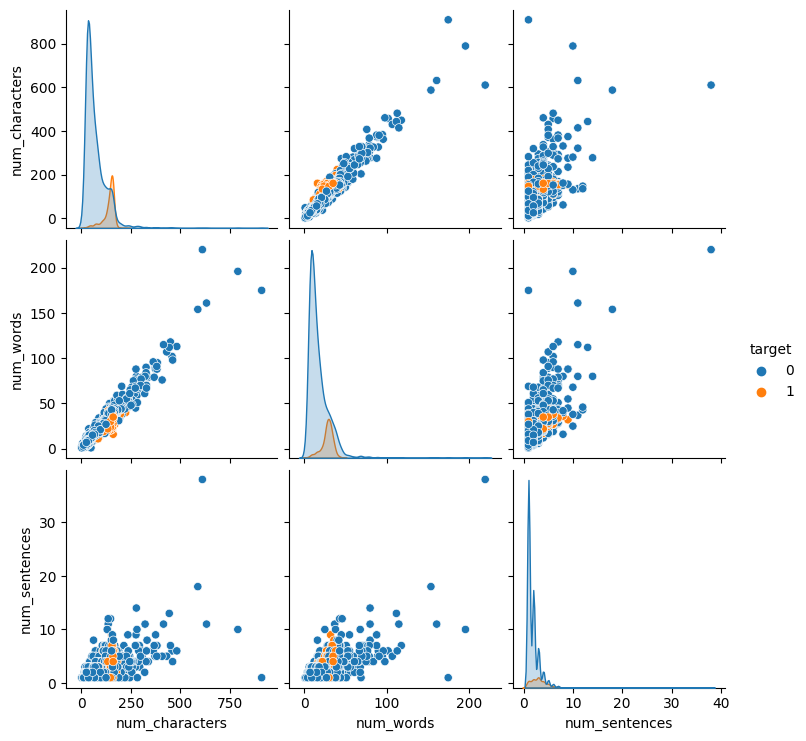

In [28]:
# plotting pair plot 
sns.pairplot(df, hue='target');

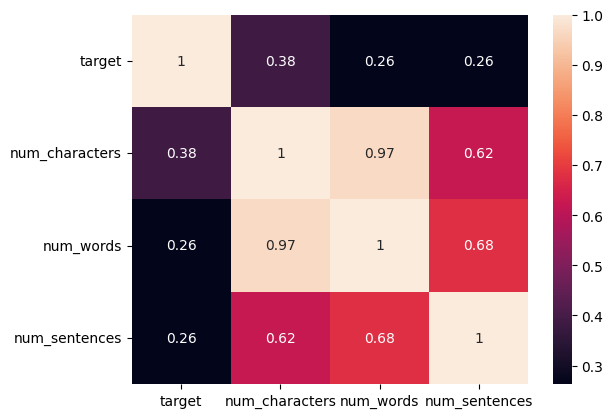

In [29]:
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True);

## 3. Data Preprocessing 
- Lower case 
- Tokenizeation 
- Removing Special characters 
- Removing stop words and punctuation 
- Stemming

In [30]:
# downloading the stop words from nltk
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
# importing stop words from nltk library 
from nltk.corpus import stopwords
# stopwords.words('english') 

In [32]:
# puctuations
import string  
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
# importing stemming from nltk 
from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer() 

# testing the stemmer 
ps.stem('Dancing')

'danc'

In [34]:
# we will create a fuction to peform the above mentioned preprocessing

def transform_text(text):
  text = text.lower() # Lower casing the text

  text = nltk.word_tokenize(text) # Tokenization

  # Removing the special characters
  y = []
  for i in text: 
    if i.isalnum():
      y.append(i)

  # Removing stop words and punctuation
  text = y[:] 
  y.clear()

  for i in text: 
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  # stemming
  text = y[:] 
  y.clear() 
  
  for i in text: 
    y.append(ps.stem(i))

  return " ".join(y) 

In [35]:
print(f"First row in 'text' column before applying preprocessing:\n{df['text'][0]}\n")

print(f"First row in 'text' column after applying preprocessing:\n{transform_text(df['text'][0])}")

First row in 'text' column before applying preprocessing:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

First row in 'text' column after applying preprocessing:
go jurong point crazi avail bugi n great world la e buffet cine got amor wat


In [36]:
# applying transformation on our dataset 
df['transformed_text'] = df['text'].apply(transform_text)

# checking the first 5 rows of the dataset
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [37]:
# Now we will use wordcloud to see the most frequent words in 'ham' and 'spam' messages 

# importing world cloud 
from wordcloud import WordCloud 
wc = WordCloud(width= 500,
               height = 500,
               min_font_size=10,
               background_color='white') 

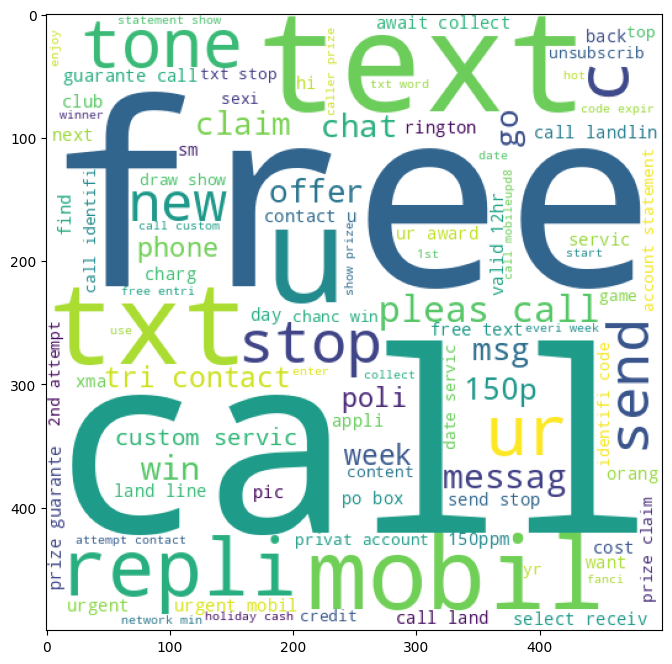

In [38]:
# word cloud for 'spam' messages 
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

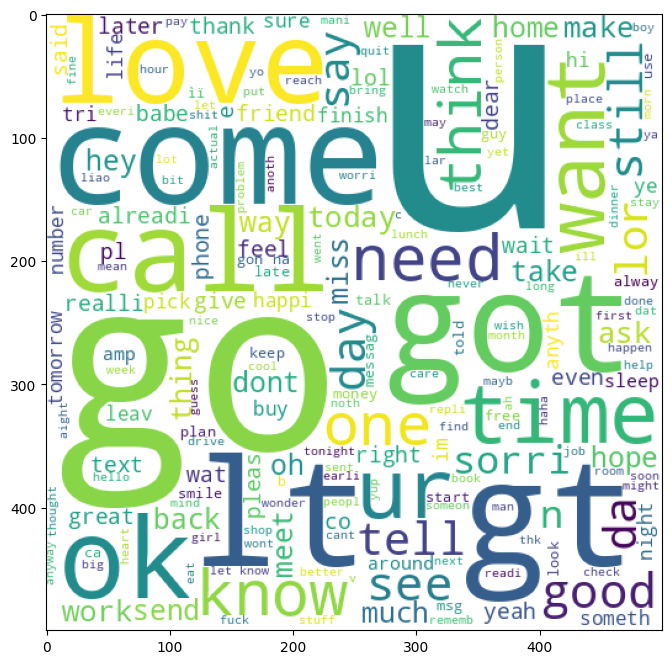

In [39]:
# word cloud for 'ham' words 
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15,8))
plt.imshow(ham_wc)

The total words in 'spam' messages: 9939



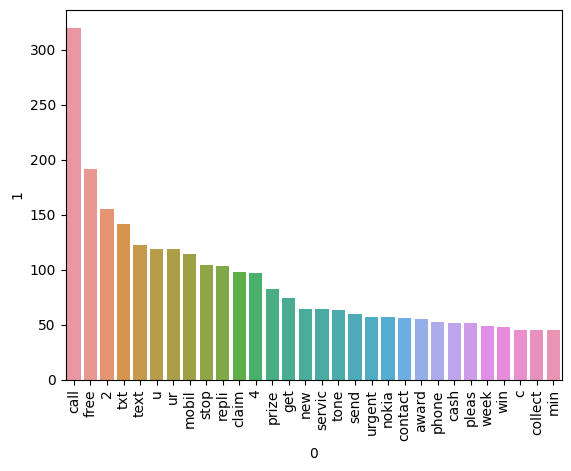

In [40]:
# let's find the most occuring word in 'ham' and 'spam' messages 

spam_corpus = [] 
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

print(f"The total words in 'spam' messages: {len(spam_corpus)}\n")

from collections import Counter 
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
            y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

plt.xticks(rotation='vertical')
plt.show()

The total words in 'spam' messages: 35404



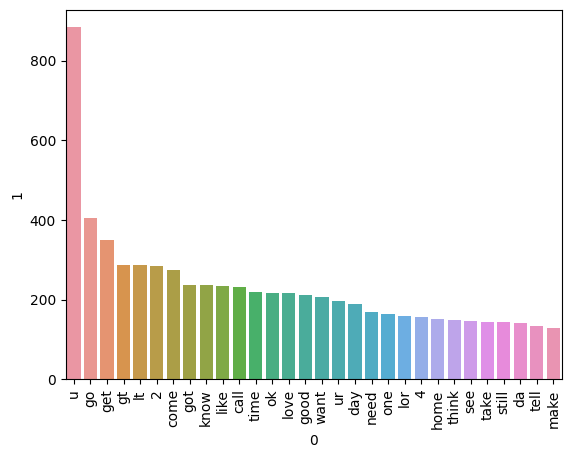

In [41]:
ham_corpus = [] 
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

print(f"The total words in 'spam' messages: {len(ham_corpus)}\n")

from collections import Counter 
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
            y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

plt.xticks(rotation='vertical')
plt.show()

### Model Building

In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [43]:
X = cv.fit_transform(df['transformed_text']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [44]:
X.shape

(5169, 6708)

In [45]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [46]:
from sklearn.model_selection import train_test_split

# splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [47]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [48]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [49]:
# GaussianNB 
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test) 

print(f"Accuray Score: {accuracy_score(y_test, y_pred1)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred1)}\n")
print(f"Precision Score: {precision_score(y_test, y_pred1)}")


Accuray Score: 0.8800773694390716

Confusion Matrix:
[[792 104]
 [ 20 118]]

Precision Score: 0.5315315315315315


In [50]:
# MultinomialNB
mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test) 

print(f"Accuray Score: {accuracy_score(y_test, y_pred1)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred1)}\n")
print(f"Precision Score: {precision_score(y_test, y_pred1)}")

Accuray Score: 0.9642166344294004

Confusion Matrix:
[[871  25]
 [ 12 126]]

Precision Score: 0.8344370860927153


In [51]:
# BernoulliNB
bnb.fit(X_train, y_train)
y_pred1 = bnb.predict(X_test) 

print(f"Accuray Score: {accuracy_score(y_test, y_pred1)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred1)}\n")
print(f"Precision Score: {precision_score(y_test, y_pred1)}")

Accuray Score: 0.9700193423597679

Confusion Matrix:
[[893   3]
 [ 28 110]]

Precision Score: 0.9734513274336283


In [52]:
# vectroization with tfidf
X = tfidf.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
X.shape

(5169, 6708)

In [54]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [55]:
# splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [56]:
# GaussianNB 
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test) 

print(f"Accuray Score: {accuracy_score(y_test, y_pred1)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred1)}\n")
print(f"Precision Score: {precision_score(y_test, y_pred1)}")


Accuray Score: 0.8762088974854932

Confusion Matrix:
[[793 103]
 [ 25 113]]

Precision Score: 0.5231481481481481


In [57]:
# MultinomialNB
mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test) 

print(f"Accuray Score: {accuracy_score(y_test, y_pred1)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred1)}\n")
print(f"Precision Score: {precision_score(y_test, y_pred1)}")


Accuray Score: 0.9593810444874274

Confusion Matrix:
[[896   0]
 [ 42  96]]

Precision Score: 1.0


In [58]:
# BernoulliNB
bnb.fit(X_train, y_train)
y_pred1 = bnb.predict(X_test) 

print(f"Accuray Score: {accuracy_score(y_test, y_pred1)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred1)}\n")
print(f"Precision Score: {precision_score(y_test, y_pred1)}")


Accuray Score: 0.9700193423597679

Confusion Matrix:
[[893   3]
 [ 28 110]]

Precision Score: 0.9734513274336283


In [59]:
# refering some more algorithms 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


In [60]:
svc = SVC(kernel='sigmoid', gamma=1.0) 
knc = KNeighborsClassifier() 
mnb = MultinomialNB() 
dtc = DecisionTreeClassifier(max_depth=5) 
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2) 
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [61]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [62]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [63]:
# testing the function
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [81]:
accuracy_scores = []
precision_scores = []

for name,clf in tqdm(clfs.items()):
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print('\n')
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

  0%|          | 0/11 [00:00<?, ?it/s]

For  SVC
Accuracy -  0.9738878143133463
Precision -  0.9663865546218487


For  KN
Accuracy -  0.9119922630560928
Precision -  1.0


For  NB
Accuracy -  0.97678916827853
Precision -  0.9913793103448276


For  DT
Accuracy -  0.9342359767891683
Precision -  0.8645833333333334


For  LR
Accuracy -  0.9593810444874274
Precision -  0.9528301886792453


For  RF
Accuracy -  0.97678916827853
Precision -  0.9830508474576272


For  AdaBoost
Accuracy -  0.9632495164410058
Precision -  0.9464285714285714


For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659


For  ETC
Accuracy -  0.9758220502901354
Precision -  0.959349593495935


For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9320388349514563


For  xgb
Accuracy -  0.9738878143133463
Precision -  0.9586776859504132




In [82]:
performance_df_0 = pd.DataFrame({'Algorithm':clfs.keys(),
                               'Accuracy':accuracy_scores,
                               'Precision':precision_scores}).sort_values('Precision',ascending=False)

performance_df_0                              

,Algorithm,Accuracy,Precision
1,KN,0.911992,1.000000
2,NB,0.976789,0.991379
5,RF,0.976789,0.983051
0,SVC,0.973888,0.966387
8,ETC,0.975822,0.959350
10,xgb,0.973888,0.958678
4,LR,0.959381,0.952830
6,AdaBoost,0.963250,0.946429
9,GBDT,0.952611,0.932039
7,BgC,0.958414,0.868217


In [83]:
performance_df0 = pd.melt(performance_df_0, 
                          id_vars='Algorithm')

performance_df0

,Algorithm,variable,value
0,KN,Accuracy,0.911992
1,NB,Accuracy,0.976789
2,RF,Accuracy,0.976789
3,SVC,Accuracy,0.973888
4,ETC,Accuracy,0.975822
5,xgb,Accuracy,0.973888
6,LR,Accuracy,0.959381
7,AdaBoost,Accuracy,0.963250
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


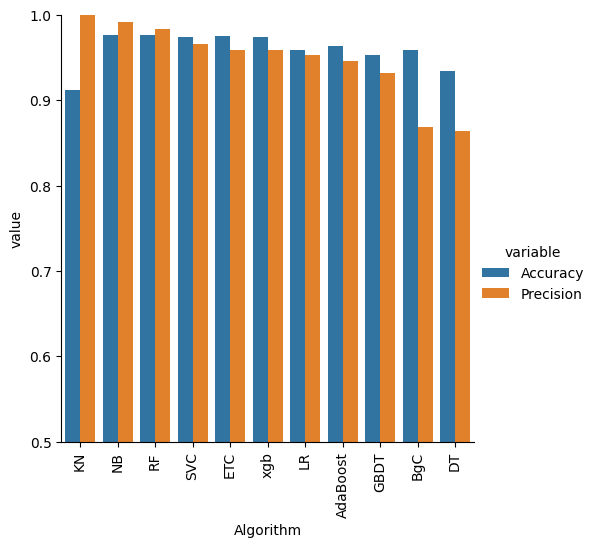

In [84]:
sns.catplot(x="Algorithm",
            y="value",
            hue="variable",
            data=performance_df0,
            kind='bar',
            height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical') 
plt.show()

### Model Improvement

In [85]:
# 1. Change the max_features parameters of TfIdf 
# for max_feature = 1000
tfidf = TfidfVectorizer(max_features=1000)

X = tfidf.fit_transform(df['transformed_text']).toarray()

# splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# GaussianNB 
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test) 
print(f"for GaussianNB")
print(f"Accuray Score: {accuracy_score(y_test, y_pred1)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred1)}\n")
print(f"Precision Score: {precision_score(y_test, y_pred1)}")

# MultinomialNB
mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test) 

print(f"\nfor MultinomialNB")
print(f"Accuray Score: {accuracy_score(y_test, y_pred1)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred1)}\n")
print(f"Precision Score: {precision_score(y_test, y_pred1)}")

# BernoulliNB
bnb.fit(X_train, y_train)
y_pred1 = bnb.predict(X_test) 

print(f"\nfor BernoulliNB")
print(f"Accuray Score: {accuracy_score(y_test, y_pred1)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred1)}\n")
print(f"Precision Score: {precision_score(y_test, y_pred1)}")

accuracy_scores = []
precision_scores = []

for name,clf in tqdm(clfs.items()):
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print('\n')
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for GaussianNB
Accuray Score: 0.7804642166344294

Confusion Matrix:
[[687 209]
 [ 18 120]]

Precision Score: 0.364741641337386

for MultinomialNB
Accuray Score: 0.9777562862669246

Confusion Matrix:
[[895   1]
 [ 22 116]]

Precision Score: 0.9914529914529915

for BernoulliNB
Accuray Score: 0.9835589941972921

Confusion Matrix:
[[893   3]
 [ 14 124]]

Precision Score: 0.9763779527559056


  0%|          | 0/11 [00:00<?, ?it/s]

For  SVC
Accuracy -  0.9690522243713733
Precision -  0.9568965517241379


For  KN
Accuracy -  0.9168278529980658
Precision -  1.0


For  NB
Accuracy -  0.9777562862669246
Precision -  0.9914529914529915


For  DT
Accuracy -  0.9400386847195358
Precision -  0.8725490196078431


For  LR
Accuracy -  0.9613152804642167
Precision -  0.9622641509433962


For  RF
Accuracy -  0.9738878143133463
Precision -  0.944


For  AdaBoost
Accuracy -  0.9632495164410058
Precision -  0.9385964912280702


For  BgC
Accuracy -  0.965183752417795
Precision -  0.9047619047619048


For  ETC
Accuracy -  0.97678916827853
Precision -  0.9523809523809523


For  GBDT
Accuracy -  0.9535783365570599
Precision -  0.9411764705882353


For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9583333333333334




In [86]:
performance_df_1 = pd.DataFrame({'Algorithm':clfs.keys(),
                               'Accuracy':accuracy_scores,
                               'Precision':precision_scores}).sort_values('Precision',ascending=False)

performance_df_1

,Algorithm,Accuracy,Precision
1,KN,0.916828,1.000000
2,NB,0.977756,0.991453
4,LR,0.961315,0.962264
10,xgb,0.972921,0.958333
0,SVC,0.969052,0.956897
8,ETC,0.976789,0.952381
5,RF,0.973888,0.944000
9,GBDT,0.953578,0.941176
6,AdaBoost,0.963250,0.938596
7,BgC,0.965184,0.904762


In [87]:
# 1. Change the max_features parameters of TfIdf 
# for max_feature = 2000
tfidf = TfidfVectorizer(max_features=2000)

X = tfidf.fit_transform(df['transformed_text']).toarray()

# splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# GaussianNB 
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test) 
print(f"for GaussianNB")
print(f"Accuray Score: {accuracy_score(y_test, y_pred1)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred1)}\n")
print(f"Precision Score: {precision_score(y_test, y_pred1)}")

# MultinomialNB
mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test) 

print(f"\nfor MultinomialNB")
print(f"Accuray Score: {accuracy_score(y_test, y_pred1)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred1)}\n")
print(f"Precision Score: {precision_score(y_test, y_pred1)}")

# BernoulliNB
bnb.fit(X_train, y_train)
y_pred1 = bnb.predict(X_test) 

print(f"\nfor BernoulliNB")
print(f"Accuray Score: {accuracy_score(y_test, y_pred1)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred1)}\n")
print(f"Precision Score: {precision_score(y_test, y_pred1)}")

accuracy_scores = []
precision_scores = []

for name,clf in tqdm(clfs.items()):
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print('\n')
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for GaussianNB
Accuray Score: 0.851063829787234

Confusion Matrix:
[[765 131]
 [ 23 115]]

Precision Score: 0.46747967479674796

for MultinomialNB
Accuray Score: 0.97678916827853

Confusion Matrix:
[[896   0]
 [ 24 114]]

Precision Score: 1.0

for BernoulliNB
Accuray Score: 0.9864603481624759

Confusion Matrix:
[[895   1]
 [ 13 125]]

Precision Score: 0.9920634920634921


  0%|          | 0/11 [00:00<?, ?it/s]

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9669421487603306


For  KN
Accuracy -  0.9081237911025145
Precision -  1.0


For  NB
Accuracy -  0.97678916827853
Precision -  1.0


For  DT
Accuracy -  0.9342359767891683
Precision -  0.8365384615384616


For  LR
Accuracy -  0.9574468085106383
Precision -  0.9607843137254902


For  RF
Accuracy -  0.9748549323017408
Precision -  0.9666666666666667


For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9537037037037037


For  BgC
Accuracy -  0.9564796905222437
Precision -  0.849624060150376


For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9752066115702479


For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9320388349514563


For  xgb
Accuracy -  0.9690522243713733
Precision -  0.9568965517241379




In [88]:
performance_df_2 = pd.DataFrame({'Algorithm':clfs.keys(),
                               'Accuracy':accuracy_scores,
                               'Precision':precision_scores}).sort_values('Precision',ascending=False)

performance_df_2   

,Algorithm,Accuracy,Precision
1,KN,0.908124,1.000000
2,NB,0.976789,1.000000
8,ETC,0.977756,0.975207
0,SVC,0.975822,0.966942
5,RF,0.974855,0.966667
4,LR,0.957447,0.960784
10,xgb,0.969052,0.956897
6,AdaBoost,0.961315,0.953704
9,GBDT,0.952611,0.932039
7,BgC,0.956480,0.849624


In [89]:
# 1. Change the max_features parameters of TfIdf 
# for max_feature = 3000
tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(df['transformed_text']).toarray()

# splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# GaussianNB 
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test) 
print(f"for GaussianNB")
print(f"Accuray Score: {accuracy_score(y_test, y_pred1)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred1)}\n")
print(f"Precision Score: {precision_score(y_test, y_pred1)}")

# MultinomialNB
mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test) 

print(f"\nfor MultinomialNB")
print(f"Accuray Score: {accuracy_score(y_test, y_pred1)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred1)}\n")
print(f"Precision Score: {precision_score(y_test, y_pred1)}")

# BernoulliNB
bnb.fit(X_train, y_train)
y_pred1 = bnb.predict(X_test) 

print(f"\nfor BernoulliNB")
print(f"Accuray Score: {accuracy_score(y_test, y_pred1)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred1)}\n")
print(f"Precision Score: {precision_score(y_test, y_pred1)}")

accuracy_scores = []
precision_scores = []

for name,clf in tqdm(clfs.items()):
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print('\n')
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for GaussianNB
Accuray Score: 0.8694390715667312

Confusion Matrix:
[[788 108]
 [ 27 111]]

Precision Score: 0.5068493150684932

for MultinomialNB
Accuray Score: 0.9709864603481625

Confusion Matrix:
[[896   0]
 [ 30 108]]

Precision Score: 1.0

for BernoulliNB
Accuray Score: 0.9835589941972921

Confusion Matrix:
[[895   1]
 [ 16 122]]

Precision Score: 0.991869918699187


  0%|          | 0/11 [00:00<?, ?it/s]

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865


For  KN
Accuracy -  0.9052224371373307
Precision -  1.0


For  NB
Accuracy -  0.9709864603481625
Precision -  1.0


For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119


For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703


For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089


For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659


For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406


For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192


For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9333333333333333




In [90]:
performance_df_3 = pd.DataFrame({'Algorithm':clfs.keys(),
                               'Accuracy':accuracy_scores,
                               'Precision':precision_scores}).sort_values('Precision',ascending=False)

performance_df_3   

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [92]:
# 1. Change the max_features parameters of TfIdf 
# for max_feature = 1500
tfidf = TfidfVectorizer(max_features=1500)

X = tfidf.fit_transform(df['transformed_text']).toarray()

# splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# GaussianNB 
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test) 
print(f"for GaussianNB")
print(f"Accuray Score: {accuracy_score(y_test, y_pred1)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred1)}\n")
print(f"Precision Score: {precision_score(y_test, y_pred1)}")

# MultinomialNB
mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test) 

print(f"\nfor MultinomialNB")
print(f"Accuray Score: {accuracy_score(y_test, y_pred1)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred1)}\n")
print(f"Precision Score: {precision_score(y_test, y_pred1)}")

# BernoulliNB
bnb.fit(X_train, y_train)
y_pred1 = bnb.predict(X_test) 

print(f"\nfor BernoulliNB")
print(f"Accuray Score: {accuracy_score(y_test, y_pred1)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred1)}\n")
print(f"Precision Score: {precision_score(y_test, y_pred1)}")

accuracy_scores = []
precision_scores = []

for name,clf in tqdm(clfs.items()):
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print('\n')
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for GaussianNB
Accuray Score: 0.8259187620889749

Confusion Matrix:
[[738 158]
 [ 22 116]]

Precision Score: 0.4233576642335766

for MultinomialNB
Accuray Score: 0.97678916827853

Confusion Matrix:
[[895   1]
 [ 23 115]]

Precision Score: 0.9913793103448276

for BernoulliNB
Accuray Score: 0.9835589941972921

Confusion Matrix:
[[893   3]
 [ 14 124]]

Precision Score: 0.9763779527559056


  0%|          | 0/11 [00:00<?, ?it/s]

For  SVC
Accuracy -  0.9738878143133463
Precision -  0.9663865546218487


For  KN
Accuracy -  0.9119922630560928
Precision -  1.0


For  NB
Accuracy -  0.97678916827853
Precision -  0.9913793103448276


For  DT
Accuracy -  0.9313346228239845
Precision -  0.8526315789473684


For  LR
Accuracy -  0.9593810444874274
Precision -  0.9528301886792453


For  RF
Accuracy -  0.97678916827853
Precision -  0.9830508474576272


For  AdaBoost
Accuracy -  0.9632495164410058
Precision -  0.9464285714285714


For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659


For  ETC
Accuracy -  0.9758220502901354
Precision -  0.959349593495935


For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9320388349514563


For  xgb
Accuracy -  0.9738878143133463
Precision -  0.9586776859504132




In [94]:
performance_df_4 = pd.DataFrame({'Algorithm':clfs.keys(),
                               'Accuracy':accuracy_scores,
                               'Precision':precision_scores}).sort_values('Precision',ascending=False)

performance_df_4   

,Algorithm,Accuracy,Precision
1,KN,0.911992,1.000000
2,NB,0.976789,0.991379
5,RF,0.976789,0.983051
0,SVC,0.973888,0.966387
8,ETC,0.975822,0.959350
10,xgb,0.973888,0.958678
4,LR,0.959381,0.952830
6,AdaBoost,0.963250,0.946429
9,GBDT,0.952611,0.932039
7,BgC,0.958414,0.868217


In [103]:
performance_df_4 = performance_df_4.rename(columns={
    'Accuracy':'Accuracy_1500_ft',
    'Precision':'Precision_1500_ft'
})

performance_df_3 = performance_df_3.rename(columns={
    'Accuracy':'Accuracy_3000_ft',
    'Precision':'Precision_3000_ft'
})

performance_df_2 = performance_df_2.rename(columns={
    'Accuracy':'Accuracy_2000_ft',
    'Precision':'Precision_2000_ft'
})

performance_df_1 = performance_df_1.rename(columns={
    'Accuracy':'Accuracy_1000_ft',
    'Precision':'Precision_1000_ft'
})

performance_df_0 = performance_df_0.rename(columns={
    'Accuracy':'Accuracy_max_ft',
    'Precision':'Precision_max_ft'
})

In [115]:
df1 = pd.merge(performance_df_0, performance_df_3, on='Algorithm', how='left')
df2 = pd.merge(df1, performance_df_2, on='Algorithm', how='right')
df3 = pd.merge(df2, performance_df_4, on='Algorithm', how='right')
df4 = pd.merge(df3, performance_df_1, on='Algorithm', how='right')
df4

,Algorithm,Accuracy_max_ft,Precision_max_ft,Accuracy_3000_ft,Precision_3000_ft,Accuracy_2000_ft,Precision_2000_ft,Accuracy_1500_ft,Precision_1500_ft,Accuracy_1000_ft,Precision_1000_ft
0,KN,0.911992,1.000000,0.905222,1.000000,0.908124,1.000000,0.911992,1.000000,0.916828,1.000000
1,NB,0.976789,0.991379,0.970986,1.000000,0.976789,1.000000,0.976789,0.991379,0.977756,0.991453
2,LR,0.959381,0.952830,0.958414,0.970297,0.957447,0.960784,0.959381,0.952830,0.961315,0.962264
3,xgb,0.973888,0.958678,0.967118,0.933333,0.969052,0.956897,0.973888,0.958678,0.972921,0.958333
4,SVC,0.973888,0.966387,0.975822,0.974790,0.975822,0.966942,0.973888,0.966387,0.969052,0.956897
5,ETC,0.975822,0.959350,0.974855,0.974576,0.977756,0.975207,0.975822,0.959350,0.976789,0.952381
6,RF,0.976789,0.983051,0.975822,0.982906,0.974855,0.966667,0.976789,0.983051,0.973888,0.944000
7,GBDT,0.952611,0.932039,0.946809,0.919192,0.952611,0.932039,0.952611,0.932039,0.953578,0.941176
8,AdaBoost,0.963250,0.946429,0.960348,0.929204,0.961315,0.953704,0.963250,0.946429,0.963250,0.938596
9,BgC,0.958414,0.868217,0.958414,0.868217,0.956480,0.849624,0.958414,0.868217,0.965184,0.904762


In [132]:
# 2. Model Improvement, adding 'num_characters' into input set 
# As per above dataframe, we got better result with max_feature=2000 

tfidf = TfidfVectorizer(max_features=2000)

X = tfidf.fit_transform(df['transformed_text']).toarray()

# appending the num_characters column to X
X = np.hstack((X, df['num_characters'].values.reshape(-1,1)))

# splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# GaussianNB 
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test) 
print(f"for GaussianNB")
print(f"Accuray Score: {accuracy_score(y_test, y_pred1)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred1)}\n")
print(f"Precision Score: {precision_score(y_test, y_pred1)}")

# MultinomialNB
mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test) 

print(f"\nfor MultinomialNB")
print(f"Accuray Score: {accuracy_score(y_test, y_pred1)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred1)}\n")
print(f"Precision Score: {precision_score(y_test, y_pred1)}")

# BernoulliNB
bnb.fit(X_train, y_train)
y_pred1 = bnb.predict(X_test) 

print(f"\nfor BernoulliNB")
print(f"Accuray Score: {accuracy_score(y_test, y_pred1)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred1)}\n")
print(f"Precision Score: {precision_score(y_test, y_pred1)}")

accuracy_scores = []
precision_scores = []

for name,clf in tqdm(clfs.items()):
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print('\n')
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for GaussianNB
Accuray Score: 0.8849129593810445

Confusion Matrix:
[[798  98]
 [ 21 117]]

Precision Score: 0.5441860465116279

for MultinomialNB
Accuray Score: 0.9661508704061895

Confusion Matrix:
[[896   0]
 [ 35 103]]

Precision Score: 1.0

for BernoulliNB
Accuray Score: 0.9864603481624759

Confusion Matrix:
[[895   1]
 [ 13 125]]

Precision Score: 0.9920634920634921


  0%|          | 0/11 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy -  0.8665377176015474
Precision -  0.0


For  KN
Accuracy -  0.9342359767891683
Precision -  0.8181818181818182


For  NB
Accuracy -  0.9661508704061895
Precision -  1.0


For  DT
Accuracy -  0.9468085106382979
Precision -  0.8807339449541285


For  LR
Accuracy -  0.9632495164410058
Precision -  0.9716981132075472


For  RF
Accuracy -  0.971953578336557
Precision -  0.9658119658119658


For  AdaBoost
Accuracy -  0.9632495164410058
Precision -  0.923728813559322


For  BgC
Accuracy -  0.9593810444874274
Precision -  0.8582089552238806


For  ETC
Accuracy -  0.9777562862669246
Precision -  0.967479674796748


For  GBDT
Accuracy -  0.9487427466150871
Precision -  0.9207920792079208


For  xgb
Accuracy -  0.9690522243713733
Precision -  0.9568965517241379




In [119]:
performance_df_5 = pd.DataFrame({'Algorithm':clfs.keys(),
                               'Accuracy':accuracy_scores,
                               'Precision':precision_scores}).sort_values('Precision',ascending=False)  

In [121]:
performance_df_5 = performance_df_5.rename(columns={"Accuracy":"Accuracy_num_char",
                                                    "Precision":"Precision_num_char"})

In [122]:
pd.merge(performance_df_2, performance_df_5, on='Algorithm', how='left')

,Algorithm,Accuracy_2000_ft,Precision_2000_ft,Accuracy_num_char,Precision_num_char
0,KN,0.908124,1.000000,0.934236,0.818182
1,NB,0.976789,1.000000,0.966151,1.000000
2,ETC,0.977756,0.975207,0.977756,0.967480
3,SVC,0.975822,0.966942,0.866538,0.000000
4,RF,0.974855,0.966667,0.971954,0.965812
5,LR,0.957447,0.960784,0.963250,0.971698
6,xgb,0.969052,0.956897,0.969052,0.956897
7,AdaBoost,0.961315,0.953704,0.963250,0.923729
8,GBDT,0.952611,0.932039,0.948743,0.920792
9,BgC,0.956480,0.849624,0.959381,0.858209


The accuracy dropped after adding 'num_characters' in the input set

In [123]:
# model improvement #3
# Creating voting classifier (the combination of best performing algorithms)
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [124]:
voting = VotingClassifier(estimators=[('svc',svc),
                                      ('nb', mnb),
                                      ('et', etc)],
                          voting='soft')

In [125]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svc',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [127]:
y_pred = voting.predict(X_test)
print(f"Accuray:{accuracy_score(y_test, y_pred)}")
print(f"Precision:{precision_score(y_test, y_pred)}")

Accuray:0.960348162475822
Precision:1.0


In [131]:
# model improvement #04 
# Applying stacking 

estimators = [('svc',svc),
              ('nb', mnb),
              ('et', etc)]
final_estimator = RandomForestClassifier()              

from sklearn.ensemble import StackingClassifier 

clf = StackingClassifier(estimators=estimators,
                         final_estimator=final_estimator)                                      


In [130]:
# training the model
clf.fit(X_train, y_train)

# testing the model
y_pred = clf.predict(X_test)

print(f"Accuray:{accuracy_score(y_test, y_pred)}")
print(f"Precision:{precision_score(y_test, y_pred)}")

Accuray:0.9758220502901354
Precision:0.937984496124031


In [133]:
# saving the model and vectorizer
import pickle 
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))